In [1]:
import numpy as np
from copy import copy
import random
import seaborn as sns
import matplotlib.pyplot as plt
from fractions import Fraction
import requests
from bs4 import BeautifulSoup
from IPython.display import Markdown, display,IFrame,HTML,Image


In [2]:
url='https://www.janestreet.com/puzzles/tic-tac-oh-index/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
display(Markdown('### Puzzle as published \n'+url))
display(HTML(str(soup.find('div', {'class' :'inner-wrapper'}))))
# Currently implemented minimax but best play against optimal != best play vs random

#https://math.stackexchange.com/questions/4045893/if-two-computers-are-playing-tic-tac-toe-but-they-are-choosing-their-squares-ra

### Puzzle as published 
https://www.janestreet.com/puzzles/tic-tac-oh-index/

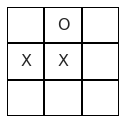

In [3]:
def to_board(moves):
    x_moves = moves[::2]
    o_moves = moves[1::2]
    annots = np.array(['X' if v in x_moves else 'O' if v in o_moves else '' for v in range(9)]).reshape((3,3))
    fig,ax = plt.subplots(1,1,figsize=(2,2))
    ax = sns.heatmap(np.zeros((3,3)),annot=annots,cbar=False,cmap="Greys",fmt="",linewidths=2,linecolor='k',annot_kws={"fontsize":16})
    ax.axis("off")

    plt.show()
    
to_board([4,1,3])

In [4]:
def is_terminal(moves):
    p1_moves = moves[::2]
    p2_moves = moves[1::2]
    wins = [(0,1,2),(3,4,5),(6,7,8),(0,3,6),(1,4,7),(2,5,8),(0,4,8),(2,4,6)]
    for w in wins:
        if all([x in p1_moves for x in w]):
            return True,10
        elif all([x in p2_moves for x in w]):
            return True,-10
    if len(moves) == 9:
            return True,-10
    return False,0

def produce_children(state):
    return [copy(state)+[i] for i in range(9) if i not in state]

def maximize(state):
    terminal_status,reward = is_terminal(state)
    if terminal_status:
        return state,reward # No further state so return same state    
    max_state, max_score = None,-np.Inf
    max_states = []
    children = produce_children(state)
    for child in children:
        _,score = minimize(child)
        if score > max_score:
            max_state,max_score = child,score
            max_states = [max_state]
            
        max_state = random.choice(max_states)
    
    return max_state,max_score

def minimize(state):      
    terminal_status,reward = is_terminal(state)
    if terminal_status:
        return state,reward # No further state so return same state    
    min_state, min_score = None,np.Inf
    min_states = []
    children = produce_children(state)
    for child in children:
        _,score = maximize(child)
        if score < min_score:
            min_state,min_score = child,score
            min_states = [min_state]
    min_state = random.choice(min_states)
    
    return min_state,min_score

In [5]:
def winner(moves):
    p1_moves = moves[::2]
    p2_moves = moves[1::2]
    wins = [(0,1,2),(3,4,5),(6,7,8),(0,3,6),(1,4,7),(2,5,8),(0,4,8),(2,4,6)]
    for w in wins:
        if all([x in p1_moves for x in w]):
            return 0
        elif all([x in p2_moves for x in w]):
            return 1
    if len(moves) == 9:
            return 2
    return -1

def games(moves=[],optimal=False):
    score= [0,0,0]
    games = [[moves,1]]
    poss_games =[]
    n=0
    while len(games) >0:
        moves,prob = games.pop()        
        if winner(moves) != -1:
            n +=1
            score[winner(moves)] += prob
            poss_games.append(moves)
        else:
            poss_moves = [i for i in range(9) if i not in moves]
            if len(moves) % 2 ==1 or optimal == False:
                next_prob = len(poss_moves)
                for i in poss_moves:
                    games.append([copy(moves)+[i],prob*Fraction(1,next_prob)])
            else:
                games.append([copy(moves)+[maximize(moves)[0][-1]],prob])    
    return score,n,

In [6]:
for i in [0,1,4]:
    print("Start {} results {}".format(i,games([i],optimal=True)))

Start 0 results ([Fraction(191, 192), Fraction(1, 192), 0], 100)
Start 1 results ([Fraction(353, 384), Fraction(13, 192), Fraction(5, 384)], 125)
Start 4 results ([Fraction(185, 192), Fraction(13, 384), Fraction(1, 384)], 199)


In [7]:
url='https://www.janestreet.com/puzzles/tic-tac-oh-solution/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
display(Markdown('### Solution as published \n'+url))
display(HTML(str(soup.find('div', {'class' :'inner-wrapper'}))))

### Solution as published 
https://www.janestreet.com/puzzles/tic-tac-oh-solution/

In [8]:
games([])

([Fraction(737, 1260), Fraction(121, 420), Fraction(8, 63)], 255168)

In [9]:
games([],optimal=True)

([Fraction(191, 192), Fraction(1, 192), 0], 100)

In [10]:
191/192

0.9947916666666666